# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives


From the Description statement, it is clear that the main objective is to determine the efficacy of the new landing page feature in collecting new subscribers. The questions we are looking to answer are as follow:
1.   Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import wordcloud as wc
import scipy
import scipy.stats as stats

## Reading the Data into a DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/UTDSBA/Business Statistics/Project_2/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

###Data Overview

####Viewing the first and last few rows of the dataset

In [4]:
#first 5 rows
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
#last 5 Rows
data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


####Checking the shape of the dataset

In [6]:
data.shape

(100, 6)

#####The dataset has 100 rows and 6 columns

####Getting the statistical summary for the variables

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


As seen above we have time_spent_on_the_page are the numerical variable, while group,landing_page,converted and language_preferred are categorical variables

In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Looking at the numerical variable summary
data['time_spent_on_the_page'].max()

10.71

In [10]:
data['time_spent_on_the_page'].min()

0.19

In [ ]:
data['time_spent_on_the_page'].mean()

5.377800000000001

In [ ]:
#Let's list all the categorical variable summary
cat_var = ['group','landing_page','converted','language_preferred']

for column in cat_var:
    print(data[column].value_counts())
    print("*"*50)

control      50
treatment    50
Name: group, dtype: int64
**************************************************
old    50
new    50
Name: landing_page, dtype: int64
**************************************************
yes    54
no     46
Name: converted, dtype: int64
**************************************************
Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64
**************************************************


#####Check for missing values

In [ ]:
data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There is no missing values in the data set.

#####Check for duplicate values

In [ ]:
data.duplicated().value_counts()

False    100
dtype: int64

#####Observations



*   Dataset has total of 100 rows and 6 columns
*   The maximum time spent on a page by users is 10.71 minutes
*   The minimum time spent on a page by users is 0.19 minutes
*   The average time spent on a page by users is 5.38 minutes.
*   There is no mising values in data set
*   Also, there are no duplicate values in data set.



###Univariate Analysis

####Looking at time_spent_on_page variable

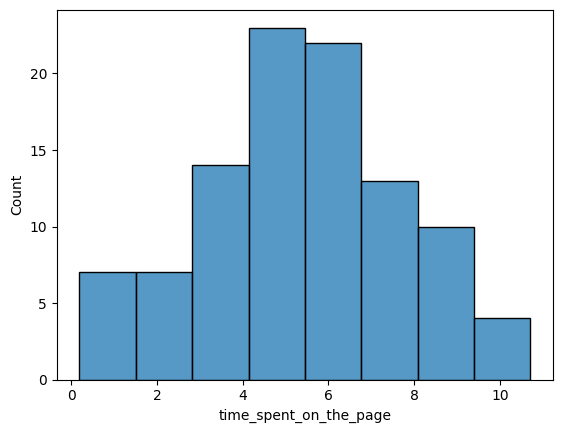

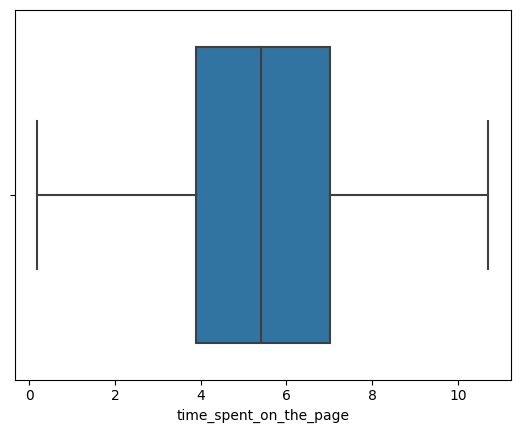

In [ ]:
sns.histplot(data=data,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=data,x='time_spent_on_the_page')
plt.show()

####Lets look at group column

In [ ]:
data['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

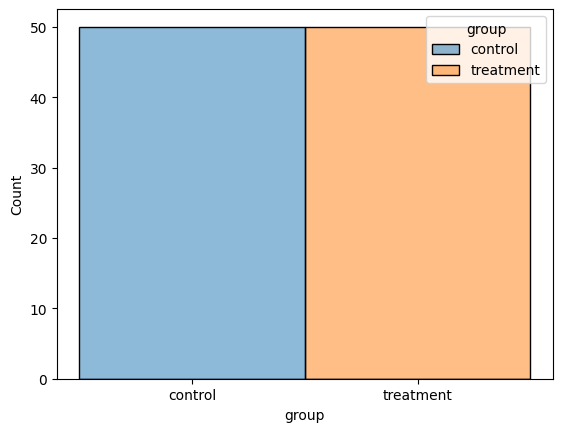

In [ ]:
#plotting the group column distribution
sns.histplot(data=data,x='group',hue='group')
plt.show()

####Landing page column

In [ ]:
data['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

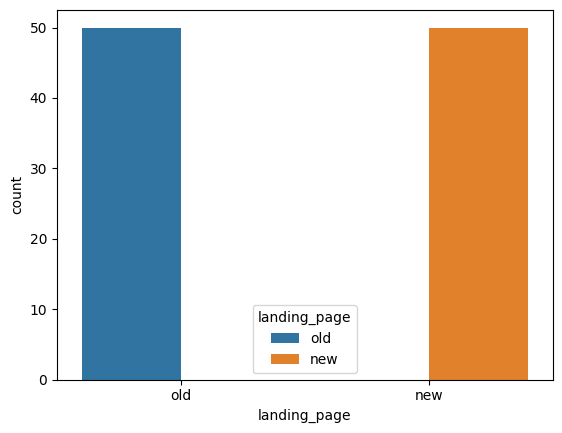

In [ ]:
#landing page plot
sns.countplot(data=data,x='landing_page',hue='landing_page');

####Language Preferred Column

In [ ]:
data['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

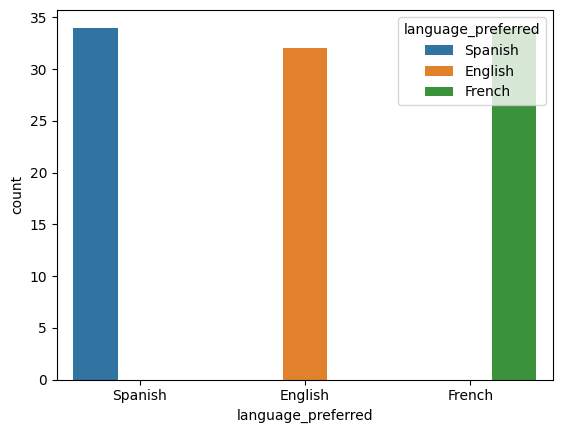

In [ ]:
#count plot
sns.countplot(data=data,x='language_preferred',hue='language_preferred')
plt.show()

####Converted column

In [ ]:
#Counts for converted
data['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

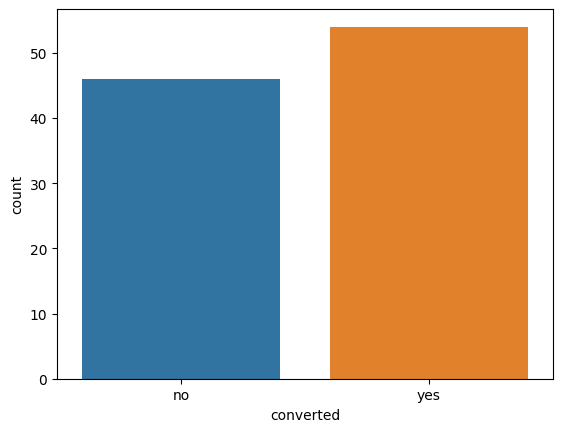

In [ ]:
#Count plot for Converted column
sns.countplot(data=data,x='converted')
plt.show()

### Bivariate Analysis

####Converted vs Time spent on the page

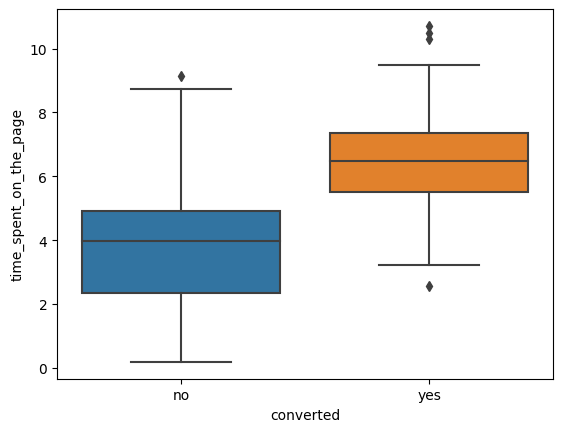

In [ ]:
sns.boxplot(data=data,x='converted',y='time_spent_on_the_page')
plt.show()

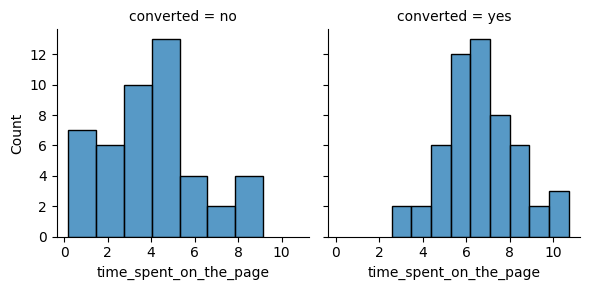

In [ ]:
a=sns.FacetGrid(data,col='converted')
a.map(sns.histplot,'time_spent_on_the_page');

####Landing page vs Time spent on the page

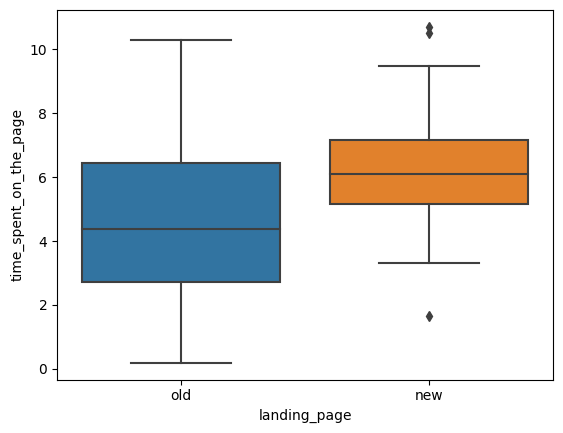

In [ ]:
sns.boxplot(data=data,x='landing_page',y='time_spent_on_the_page')
plt.show()

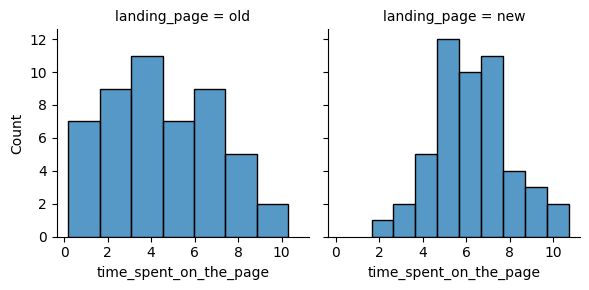

In [ ]:
a=sns.FacetGrid(data,col='landing_page')
a.map(sns.histplot,'time_spent_on_the_page');

####Language preferred vs Time spent on the page

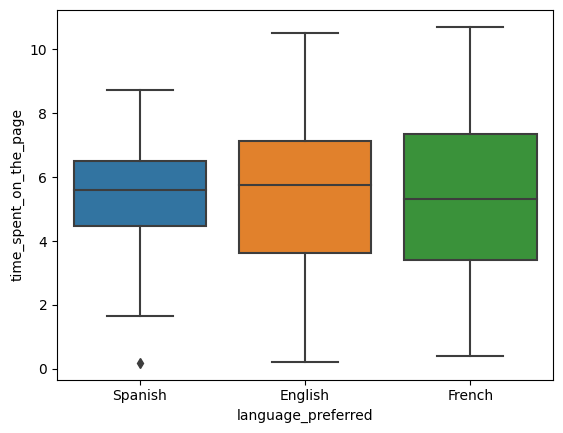

In [ ]:
sns.boxplot(data=data,x='language_preferred',y='time_spent_on_the_page')
plt.show()

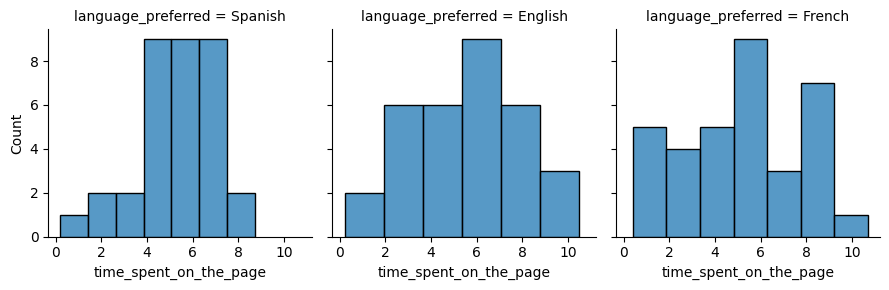

In [ ]:
a=sns.FacetGrid(data,col='language_preferred')
a.map(sns.histplot,'time_spent_on_the_page')

#### From the plots above we can conclude that there is a strong relationship between the time spent on the new and old page. Also, there is similariy between the control groups and time spent on the page

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

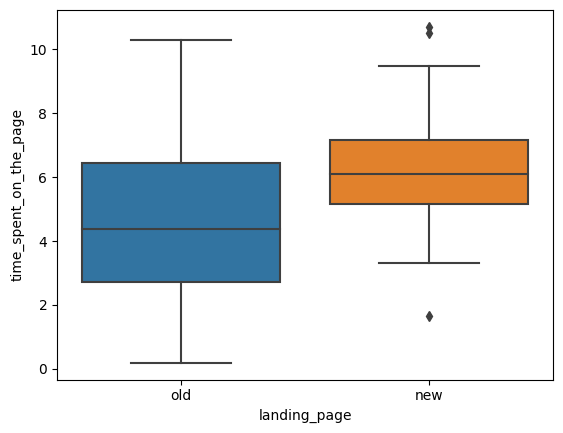

In [11]:
#visual analysis between the columns time_spent_on_the_page and landing_page
sns.boxplot(data=data,x='landing_page',y='time_spent_on_the_page')

#### As it is visible from the box plot, users spent on average 4.5 minutes on old page while the mean time spent on the new page is approximately 6 minutes.

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0$ : The mean time spent on the new landing page is equal to time spent on the old landing page . <br>
> $H_a$ : The mean time spent on the new landing page is greater than time spent on the old landing page.

Let $\mu_1$ and $\mu_2$ be the mean time from the new landing page and the mean time from the old landing page respectively.

The above formulated hypotheses can be written as:

> $H_0: \mu_1 = \mu_2 $ <br>
$H_a: \mu_1 > \mu_2 $

### Step 2: Select Appropriate test

#### Since we are looking at the mean and standard deviation lets use two sample independent t-test

### Step 3: Decide the significance level

As mentioned in the problem statement, we select the significance level 𝛼=0.05

### Step 4: Collect and prepare data

In [12]:
t_new=data[data['landing_page'] == 'new']['time_spent_on_the_page']
t_old=data[data['landing_page'] == 'old']['time_spent_on_the_page']

In [13]:
#Mean
mu = data.groupby(['landing_page'])['time_spent_on_the_page'].mean()
mu_1=round(mu[0],2)   #Mean time spent on new landing page
mu_2=round(mu[1],2)   #Mean time spent on old landing page

In [14]:
#Standard Deviation
sigma=data.groupby(['landing_page'])['time_spent_on_the_page'].std()
sigma_1=round(sigma[0],2) #standard deviation of time spent on new landing page
sigma_2=round(sigma[1],2) #standard deviation of time spent on old landing page

In [15]:
print('The mean time spent on new landing page is',mu_1)
print('The mean time spent on old landing page is',mu_2)
print('The standard deviation of time spent on the new landing page is',sigma_1)
print('The standard deviation of time spent on the old landing page is',sigma_2)

The mean time spent on new landing page is 6.22
The mean time spent on old landing page is 4.53
The standard deviation of time spent on the new landing page is 1.82
The standard deviation of time spent on the old landing page is 2.58


### Step 5: Calculate the p-value

In [16]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(t_new, t_old, equal_var=False, alternative='greater')
print('The p-value is',round(p_value,6))

The p-value is 0.000139


### Step 6: Compare the p-value with $\alpha$

####The p-value is(0.00139 < 0.05) less than α (level of significance), we reject the null hypothesis.

### Step 7:  Draw inference

Hence, the p-value (0.00139) is smaller than the level of significance, the null hypothesis is rejected. We can come to the conclusion that the users spend more time on the new landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

###Visual Analysis

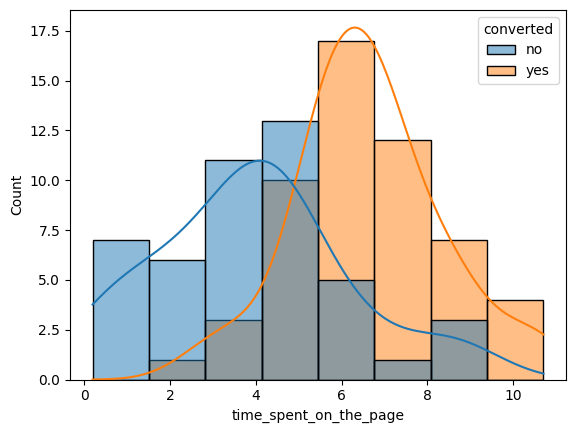

In [ ]:
#Visual analysis between the time spent on the new page and converted group
sns.histplot(data=data, x = 'time_spent_on_the_page', hue='converted' , kde=True);

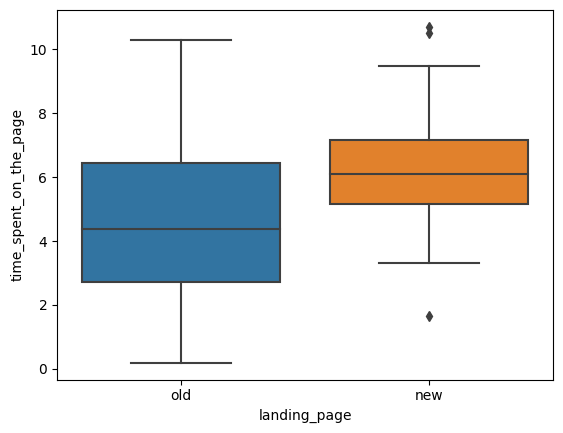

In [ ]:
#Visual analysis between the time spent on newpage and old page
sns.boxplot(data=data , x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()

### Step 1. Define the null and alternate hypotheses

####The null and alternative hypotheses can be formulated as:
The null and alternative hypotheses can be formulated as:

> $H_0:$ The conversion rate of users for the new page is same as the conversion rate of the old page. <br>
$H_a:$ The conversion rate of users for the new page greater the conversion rate of the old page

Assuming $\mu_1$ and $\mu_2$ be the mean time from the new landing page and the mean time from the old landing page respectively.

The above formulated hypotheses can be written as:

> $H_0: \mu_1 = \mu_2 $ <br>
$H_a: \mu_1 > \mu_2 $

###Step 2: Select appropriate test

As we are looking at two proporation of the population  samples from one population, Let's use two proportion z-test

###Step 3:Decide the significance level

As provided in the problem statment, level of significance α = 0.05.

###Step 4: Collect and Prepare Data

In [17]:
#calculating the number of converted and unconverted users
n = data.groupby(data['converted'])['group'].value_counts()['yes']
n

group
treatment    33
control      21
Name: group, dtype: int64

In [30]:
new_convert = n[0]  #number of users who converted in treatment group
old_convert = n[1]  #number of users who converted in control group
n_treatment = data.group.value_counts()['treatment']  #number of users intreatment group
n_control = data.group.value_counts()['control']  #number of users control group
print(n_treatment)
print(n_control)

50
50


### Step 5: Calculate the p-value

In [19]:
from statsmodels.stats.proportion import proportions_ztest

test_state, p_value = proportions_ztest([new_convert,old_convert] , [n_treatment,n_control])

print('The p-value is',p_value)

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $α$

In [ ]:
print('since the',round(p_value,4),'is smaller than (',round(p_value,4), '< 0.05)level of significance we can reject null hypothesis')

since the 0.0161 is smaller than ( 0.0161 < 0.05)level of significance we can reject null hypothesis


###Step 7: Draw inference

Hence the null hypothesis is rejected we can conclude that the conversion rate is higher for the new page than the older page.

## 3. Is the conversion and preferred language are independent or related?

###Visual analysis

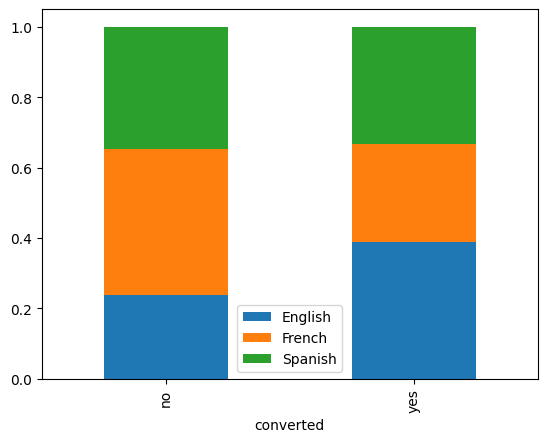

In [20]:
pd.crosstab(data['converted'],data['language_preferred'],normalize='index').plot(kind="bar",stacked=True)
plt.legend()
plt.show()

###Step 1: Define the null and alternate hypotheses

We will test the following null hypothesis:

>$H_0:$ Converted status is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Converted status depends on preferred language.

### Step 2: Select Appropriate test

####Since we are checking if the conversion status is independent of language. Where the language and converted status are categorical variables. Let's select **Chi-Square Test for Independence**


### Step 3: Decide the level of significance

#### As provided in the problem statement, the level of significance α = 0.05

### Step 4: Collect and prepare data

In [21]:
data.groupby(data['converted'])['language_preferred'].value_counts().T

converted  language_preferred
no         French                19
           Spanish               16
           English               11
yes        English               21
           Spanish               18
           French                15
Name: language_preferred, dtype: int64

In [22]:
con_table=pd.crosstab(data['converted'], data['language_preferred'])
con_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [23]:
from scipy.stats import chi2_contingency

chi2, p_value,dof,exp_freq = chi2_contingency(con_table)

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $α$

In [24]:
print('As the p-value',round(p_value,4),'is greater than the level of significance, we can not reject the null hypothesis')

As the p-value 0.213 is greater than the level of significance, we can not reject the null hypothesis


###Step 7: Draw Inference

#### As the p-value is higher than the level of significance, we fail to reject the null hypothesis, we can conclude that converted status is independent of preferred language

## 4. Is the time spent on the new page same for the different language users?

### Visual Analysis

In [25]:
#let's creat a new data list for the users who were served the new landing page
data_new = data[data['landing_page']=='new']

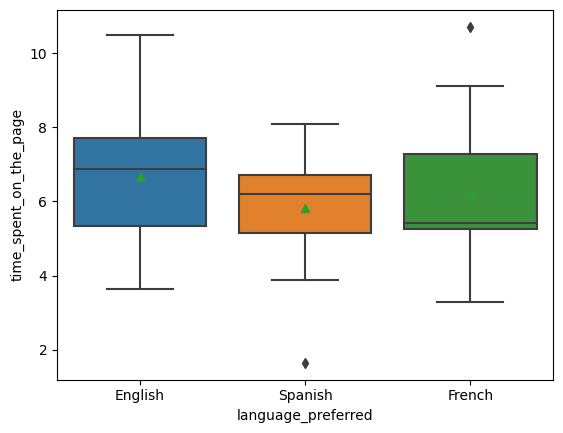

In [26]:
#let's look at the box plot of language preferred and time spent on the page for new landing page
sns.boxplot(data=data_new,x = 'language_preferred' , y = 'time_spent_on_the_page',showmeans = True)
plt.show()

In [27]:
data_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of the time spent on the new page for each language English, French, Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one language mean time is different.

### Step 2: Select Appropriate Test

Since, we are looking at 3 different means. We assume the populations are normally distributed, the samples are independent simple random samples, and the population variances are equal. Let's select **One-way ANOVA test**.

### Step 3: Decide the level of significance

As given in the problem statement, we select $α$ = 0.05.

###Step 4: Collect and prepare data

In [28]:
#time spent on the new page by preferred language
t_english = data_new[data_new['language_preferred']=="English"]['time_spent_on_the_page'] #time spent on the new page by English as preferred language
t_french = data_new[data_new['language_preferred']=="French"]['time_spent_on_the_page'] #time spent on the new page by French as preferred language
t_spanish = data_new[data_new['language_preferred']=="Spanish"]['time_spent_on_the_page'] #time spent on the new page by Spanish as preferred language

### Step 5: Calculate the p-value

#### To test the normality, Shapiro Wilk's test is applied

We will test the following null hypothesis:

>$H_0:$ Preferred language follows a normal distribution against

the alternative hypothesis:

>$H_a:$ Preferred language does not follow a normal distribution

In [29]:
from scipy import stats

w, p_value = stats.shapiro(data_new['time_spent_on_the_page'])
print('The p-value is',p_value)

The p-value is 0.8040016293525696


#### Since the p-value is very much bigger than the level of significance we fail to reject the null hypothesis. Which means the response is normally distributed

#### Leven's test

We will test the null hypothesis:

>$H_0$: All the population variances are equal

against the alternative hypothesis:

>$H_a$: At least one variance is different from the rest

In [ ]:
from scipy.stats import levene

test_stat, p_value = levene (t_english,t_french,t_spanish)

print('The p-value is',p_value)

The p-value is 0.46711357711340173


The p-value is still higher, which means we can not reject the null hypothesis. That means the variances are homogeneous.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Let's find the p-value

In [ ]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway (t_english,t_french,t_spanish)

print ('The p-value is',p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $α$

Since the p_value is higher than the level of significance we fail to reject the null hypothesis.

### Step 7: Draw Inference

Since the p-value is higher than level of significance, we reject the null hypothesis. We don't have enough statistical siginficance to conclude that time spent on at least one of the preferred language is different in mean than other languages

## Conclusion and Business Recommendations

###Conclusions
* From the data that is presented we can say that the time spent on new landing page is more than time spent on old landing page.
* If we look at the control groups and the conversion rate it is fairly visible that **33 out of 50** users converted after new landing page while only **21 out of 50** user converted using the old page, we can conclude that the conversion rate for the new landing page is higher than the old landing page.
* From question 3 analysis we can give the statement that the preferred language is independent of the conversion rate.
*From question 4 answer, it is evident that the data is lacking enough statistical evidence to prove that time spent on at least one of the preferred language is different in mean than other languages.


###Business Recommendation
* It would be beneficial to have other parameters that affect the behaviour of the users. Those parameters can be type of programs, video and audio. These parameters can help us determining the behaviour of users more intimately.

* More insightful variables like time spent during weekends and weekdays, time of year and holiday, also if it is summer or winter (school vacation).

* For different control groups it would be helpful if we have some kind of interactive feature on the landing page.